In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('profit.csv')
df.tail()

Unnamed: 0       Date  Open  High   Low  Close  Adj Close  Volume  \
134         134  9/20/2019  6.03  6.07  5.90   5.92   5.702165  321000   
135         135  9/23/2019  5.98  6.12  5.96   6.06   5.837014  143700   
136         136  9/24/2019  6.25  6.28  5.99   6.03   5.808118  198000   
137         137  9/25/2019  5.85  5.92  5.83   5.91   5.692533  170800   
138         138  9/26/2019  5.82  5.87  5.80   5.82   5.605845  181500   

         pred  Buy  Sell  flag  profit  Unnamed: 13  Unnamed: 14  
134  0.082967  NaN  5.92     0     NaN          NaN          NaN  
135  0.082755  NaN  6.06     0     NaN          NaN          NaN  
136  0.082547  NaN  6.03     0     NaN          NaN          NaN  
137  0.082351  NaN  5.91     0     NaN          NaN          NaN  
138  0.082165  NaN  5.82     0     NaN          NaN          NaN

In [58]:
df['change'] = df['Close'].pct_change()
mu = df['change'][1:].mean() 
sigma = df['change'][1:].std()
model = {}
model['pred'] = [df['Close'][0]]
for time in range(1, len(df)):
    old_price = model['pred'][time -1] 
    new_price = old_price*(1+ mu) + old_price*sigma*np.random.normal(0,1) 
    model['pred'].append(new_price)

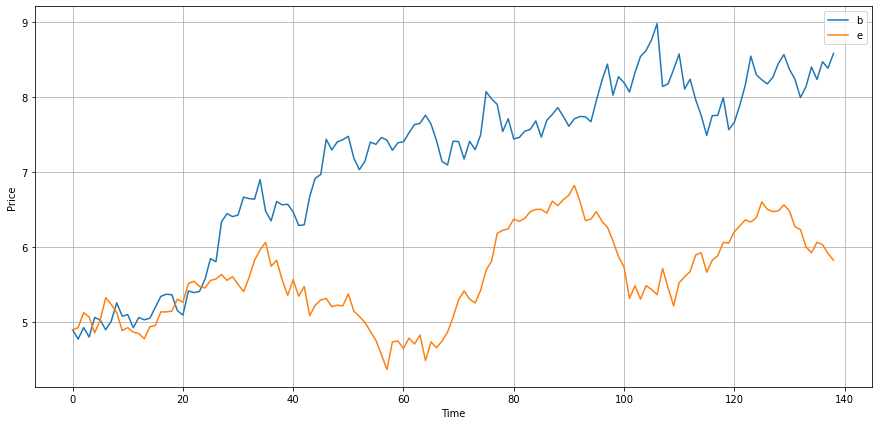

In [59]:
##Plot av faktisk pris
df1 = pd.DataFrame(model)
df1['Actual']=df['Close']
df1.plot(figsize=(15,7),grid=True,legend=False)
plt.xlabel('Time')
plt.ylabel('Price')
#Få en overskrift
plt.legend('best')

In [60]:
df1.head()

pred  Actual
0  4.890000    4.89
1  4.766903    4.92
2  4.919846    5.12
3  4.794608    5.06
4  5.055758    4.85

In [61]:
df1['Buy'] = float(0)
df1['Sell'] = float(0)
#-1 er selg, 1 er kjøp
df1['flag'] = -1

for i in range(1, len(df1)):
    if df1.pred[i] > df1.pred[i-1]:
        if df1['flag'][i]!=1:
            df1['Buy'][i] = df1['Actual'][i]
            df1['Sell'][i] = np.nan
            df1['flag'][i] = 1
        else:
            df1['Buy'][i] = np.nan
            df1['Sell'][i] = np.nan
    if df1.pred[i] < df.pred[i-1]:
        if df1['flag'][i]!=0:
            df1['Sell'][i]= df['Actual'][i]
            df1['Buy'][i]=np.nan
            df1['flag'][i] = 0
        else:
            df1['Sell'][i]=np.nan
            df1['Buy'][i]=np.nan
    else:
        df1['Sell'][i]=np.nan
        df1['Buy'][i]=np.nan

In [44]:
df1['profit']=np.nan
for i in range(1, len(df)):
    if 

In [62]:
df1.to_csv(r'C:\Users\larsm\OneDrive\NHH\Master\Høst20\Masteroppgave\randomWalk1.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\larsm\\OneDrive\\NHH\\Master\\Høst20\\Masteroppgave\\randomWalk1.csv'